# PPatel Homework #4 - Matplotlib

# Dependancies & Starter Code

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#mouse_metadata.head()
#study_results.head()

mouse_study_dataset = pd.merge(mouse_metadata, study_results, how="left", on = ["Mouse ID", "Mouse ID"])

In [110]:
mouse_study_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary Table: Tumor Volume (mm3)

In [111]:
# SET INDEX & DIVIDE BY REGIMEN............................................................................
index_by_regimen = mouse_study_dataset.set_index(['Drug Regimen'])
mouse_study_grouped = index_by_regimen.groupby(["Drug Regimen"])

#CREATE VARIABLES..........................................................................................
regimen_volume_means = round(mouse_study_grouped['Tumor Volume (mm3)'].mean(),2)
regimen_volume_medians = round(mouse_study_grouped['Tumor Volume (mm3)'].median(),2)
regimen_volume_variance = round(mouse_study_grouped['Tumor Volume (mm3)'].var(),2)
regimen_volume_stddev = round(mouse_study_grouped['Tumor Volume (mm3)'].std(),2)
regimen_volume_SEM = round(mouse_study_grouped['Tumor Volume (mm3)'].sem(),3)

#CREATE DATAFRAME..........................................................................................
summary_stats = pd.DataFrame({"Tumor Volume Mean": regimen_volume_means,
                              "Tumor Volume Median": regimen_volume_medians,
                              "Tumor Volume Variance": regimen_volume_variance,
                              "Tumor Volume Std Dev": regimen_volume_stddev,
                              "Tumor Volume SEM": regimen_volume_SEM})


summary_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.329
Ceftamin,52.59,51.78,39.29,6.27,0.470
Infubinol,52.88,51.82,43.13,6.57,0.492
Ketapril,55.24,53.70,68.55,8.28,0.604
Naftisol,54.33,52.51,66.17,8.13,0.596
Placebo,54.03,52.29,61.17,7.82,0.581
Propriva,52.32,50.85,42.35,6.51,0.513
Ramicane,40.22,40.67,23.49,4.85,0.321
Stelasyn,54.23,52.43,59.45,7.71,0.573


# Tumor Growth per Regimen Bar Graph: Matplotlib

Text(0, 0.5, 'Average Tumor Volume Growth (mm3)')

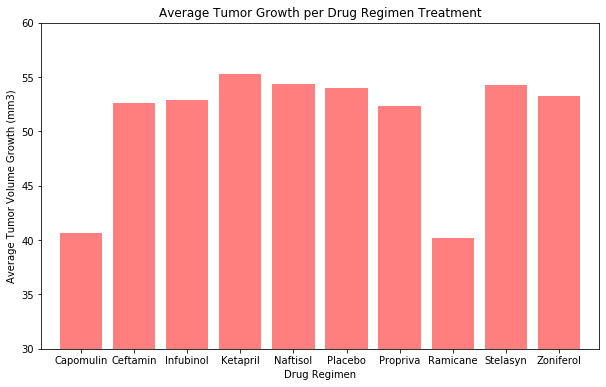

In [112]:
# CREAT VARIABLE FOR X-AXIS.......................................................................
drug_regimen_unsorted = mouse_study_dataset.sort_values("Drug Regimen")
drug_regimen = drug_regimen_unsorted["Drug Regimen"].unique()

# PLOT BAR GRAPH..................................................................................
plt.figure(figsize=(10,6))
plt.bar(drug_regimen, regimen_volume_means, color='r', alpha=0.5, align="center")
tick_locations = [value for value in drug_regimen]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])
plt.xlim(-0.75, len(drug_regimen)-0.25)
plt.ylim(30, 60)
plt.title("Average Tumor Growth per Drug Regimen Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume Growth (mm3)")

# Tumor Growth per Regimen Bar Graph: Pandas

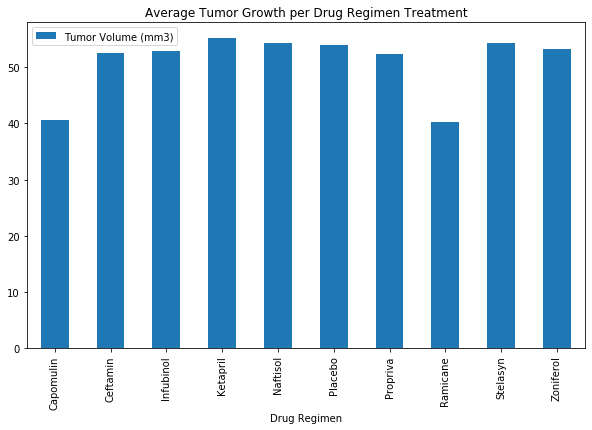

<Figure size 432x288 with 0 Axes>

In [113]:
# REORGANIZE DATA....................................................................................
mouse_study_dataset_reduced = mouse_study_dataset[["Drug Regimen", "Tumor Volume (mm3)"]]
drugs_and_growth = mouse_study_dataset_reduced.groupby(["Drug Regimen"]).mean()
drugs_and_growth

# PLOT BAR GRAPH.....................................................................................
drugs_and_growth.plot(kind="bar", figsize=(10,6))
plt.title("Average Tumor Growth per Drug Regimen Treatment")

plt.show()
plt.tight_layout()

# Mouse Sex: Matplotlib

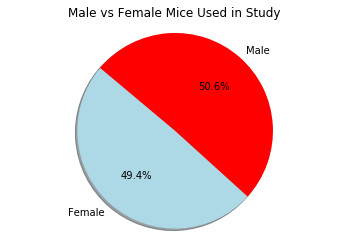

In [114]:
# CREATE VARIABLES.................................................................................................
sex_assignment = mouse_study_dataset.sort_values("Sex")
sex_values = sex_assignment['Sex'].unique()

sex_grouping = mouse_study_dataset.groupby("Sex")
num_sex = sex_grouping['Sex'].count()

colors = ["lightblue","red"]
explode = (0,0)

# CREATE PIE CHART.................................................................................................
plt.pie(num_sex, explode=explode, labels=sex_values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Male vs Female Mice Used in Study")
plt.show()


# Mouse Sex: Pandas

Text(0.5, 1.0, 'Male vs Female Mice Used in Study')

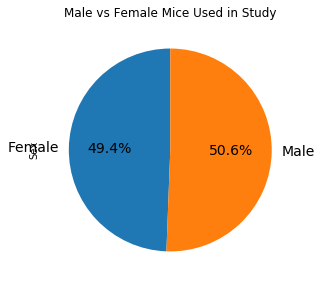

In [115]:
ax1 = plt.subplot(121, aspect='equal')
num_sex.plot(kind="pie", y ='num_sex', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, labels=sex_values, legend = False, fontsize=14, figsize=(10,6))
plt.title("Male vs Female Mice Used in Study")

# Promising Regimens

In [131]:
Capomulin_data = mouse_study_dataset.loc[mouse_study_dataset["Drug Regimen"] == "Capomulin",:]
#Capomulin_ID_index = Capomulin_data.set_index(['Mouse ID'])
Capomulin_by_MouseID = Capomulin_data.groupby("Mouse ID")
Capomulin_final_timepoint = Capomulin_by_MouseID[[ "Timepoint"]].max()
#Capomulin_short = Capomulin_by_MouseID[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

Capomulin_final_timepoint

,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45
i557,45
i738,45
j119,45
j246,35


In [133]:
Capomulin_final_volume = pd.merge(Capomulin_final_timepoint, mouse_study_dataset, how="left", on = ["Mouse ID", "Mouse ID"])

Capomulin_final_volume 

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,0,45.000000,0
1,b128,45,Capomulin,Female,9,22,5,45.651331,0
2,b128,45,Capomulin,Female,9,22,10,43.270852,0
3,b128,45,Capomulin,Female,9,22,15,43.784893,0
4,b128,45,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...,...
225,y793,45,Capomulin,Male,17,17,25,38.992734,2
226,y793,45,Capomulin,Male,17,17,30,35.726023,2
227,y793,45,Capomulin,Male,17,17,35,36.327870,2
228,y793,45,Capomulin,Male,17,17,40,31.475411,2
